Skript to Visualize and Replicate Axtell 99

In [289]:
import matplotlib.pyplot as plt
import dask.dataframe as dd
import pandas as pd
import scipy.signal
import numpy as np

In [290]:
out_dir = "../results/axtell_99"

In [291]:
opttype = 1

In [576]:
run = 1000

In [577]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [578]:
path_f = f"{out_dir}/res_firm_agent_run{run}_opttype{opttype}.csv.gz"

In [579]:
path_w = f"{out_dir}/res_worker_agent_run{run}_opttype{opttype}.csv.gz"

In [580]:
path_m = f"{out_dir}/res_model_agent_run{run}_opttype{opttype}.csv.gz"

In [581]:
model_dk = dd.read_csv(path_m, blocksize=None)

In [582]:
firm_dk = dd.read_csv(path_f, blocksize=None , dtype={
    "t": "int16",
    "id": "int32",
    "age": "int16",
    "number_employees": "int32",
    "total_effort": "float64",
    "output": "float64",
    "average_pref": "float64"}
)

In [583]:
df = model_dk.compute()

In [584]:
firm_dk.compute()

,t,id,age,number_employees,total_effort,output,average_pref
0,0,2001,1,1,0.247879,0.309323,0.247879
1,0,2002,1,6,1.670293,4.460171,0.278382
2,0,2003,1,1,0.457970,0.667706,0.457970
3,0,2004,1,4,0.771725,1.367284,0.192931
4,0,2005,1,4,1.518977,3.826270,0.379744
...,...,...,...,...,...,...,...
4371429,9999,2403217,1,1,0.601569,0.963454,0.601569
4371430,9999,2403218,1,1,0.868012,1.621457,0.868012
4371431,9999,2403219,1,1,0.949397,1.850752,0.949397
4371432,9999,2403220,1,1,0.856991,1.591426,0.856991


In [585]:
firm_number = firm_dk.groupby(firm_dk.t).t.size()

In [586]:
firm_number.compute()

t
0       464
1       445
2       434
3       418
4       419
       ... 
9995    423
9996    425
9997    429
9998    448
9999    441
Name: t, Length: 10000, dtype: int64

In [587]:
df

,t,total_firms,numb_new_firms,numb_dead_firms
0,0,464,464,1000
1,1,445,236,255
2,2,434,243,254
3,3,418,231,247
4,4,419,230,229
...,...,...,...,...
9995,9995,423,225,237
9996,9996,425,240,238
9997,9997,429,232,228
9998,9998,448,255,236


In [588]:
width = 390

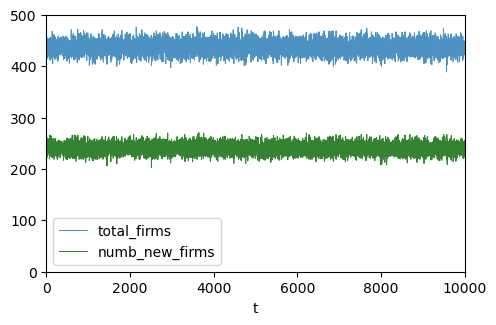

In [591]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,500])
ax.set_xlim([0,10000])
df.plot(kind="line", y = "total_firms", x="t", ax=ax, linewidth=0.75, alpha=0.8)
df.plot(kind="line", y = "numb_new_firms", x="t", color="darkgreen", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

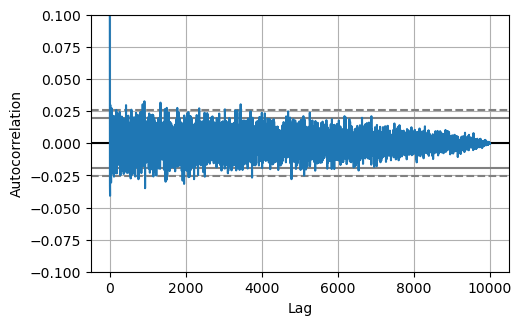

In [592]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([-0.1,0.1])
pd.plotting.autocorrelation_plot(series=df.total_firms, ax = ax)
plt.show()

In [593]:
average_firm = firm_dk.groupby(firm_dk.t).number_employees.mean().compute()

In [594]:
average_firm

t
0       2.155172
1       2.247191
2       2.304147
3       2.392344
4       2.386635
          ...   
9995    2.364066
9996    2.352941
9997    2.331002
9998    2.232143
9999    2.267574
Name: number_employees, Length: 10000, dtype: float64

In [595]:
max_firm = firm_dk.groupby(firm_dk.t).number_employees.max().compute()

In [596]:
max_firm

t
0        6
1       10
2       13
3       17
4       18
        ..
9995    15
9996    14
9997    13
9998    12
9999    15
Name: number_employees, Length: 10000, dtype: int32

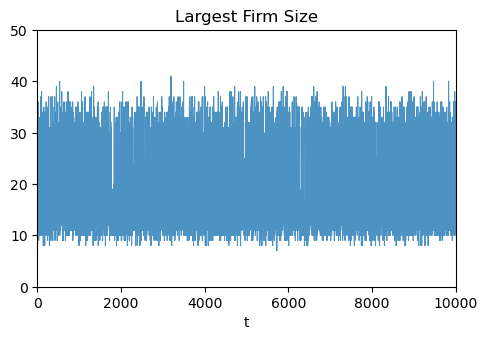

In [599]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,50])
ax.set_xlim([0,10000])
ax.set_title("Largest Firm Size")
max_firm.plot(kind="line", y = "Largest Firm Size", x="t", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

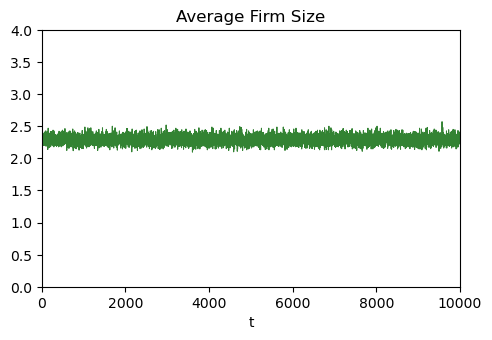

In [602]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,4])
ax.set_xlim([0,10000])
ax.set_title("Average Firm Size")
average_firm.plot(kind="line", y = "Average Firm Size", x="t", color="darkgreen", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

Effort Levels

Average effort level (from worker df)

In [603]:
worker_dk = dd.read_csv(path_w, blocksize=None)

In [604]:
avg_effort = worker_dk.groupby(worker_dk.t).effort.mean().compute()

In [605]:
avg_effort

t
0       0.428820
1       0.348919
2       0.349780
3       0.347780
4       0.344147
          ...   
9995    0.343676
9996    0.347627
9997    0.346111
9998    0.356994
9999    0.351157
Name: effort, Length: 10000, dtype: float64

In [606]:
firm_dk.assign(avg_e = firm_dk.total_effort/firm_dk.number_employees).groupby(firm_dk.t).number_employees.idxmax()

Dask Series Structure:
npartitions=1
    int64
      ...
Name: number_employees, dtype: int64
Dask Name: series-groupby-idxmax-agg, 8 tasks

In [607]:
filtered_firm_dk = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]].assign(avg_e = firm_dk.total_effort/firm_dk.number_employees)

C:\Users\41782\AppData\Local\Temp\ipykernel_28596\188437644.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .transform(func)
  After:  .transform(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .transform(func, meta=('x', 'f8'))            for series result
  filtered_firm_dk = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]].assign(avg_e = firm_dk.total_effort/firm_dk.number_employees)


In [608]:
avg_effort_maxfirm = filtered_firm_dk.groupby("t").avg_e.mean().compute()

In [609]:
avg_effort_maxfirm

t
0       0.438588
1       0.437192
2       0.391566
3       0.235535
4       0.382936
          ...   
9995    0.311289
9996    0.251709
9997    0.219744
9998    0.414798
9999    0.272901
Name: avg_e, Length: 10000, dtype: float64

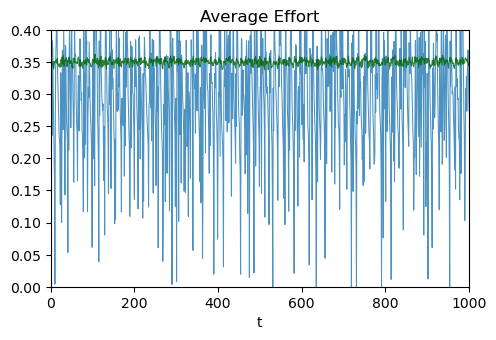

In [610]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,0.4])
ax.set_xlim([0,1000])
ax.set_title("Average Effort")
avg_effort_maxfirm.plot(kind="line", y = "total_firms", x="t", ax=ax, linewidth=0.75, alpha=0.8)
avg_effort.plot(kind="line", y = "numb_new_firms", x="t", color="darkgreen", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

Output Total and Largest Firm

In [611]:
filtered_firm_dk2 = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]]

C:\Users\41782\AppData\Local\Temp\ipykernel_28596\2543161246.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .transform(func)
  After:  .transform(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .transform(func, meta=('x', 'f8'))            for series result
  filtered_firm_dk2 = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]]


In [612]:
output_max_firm = filtered_firm_dk2.groupby("t").output.max().compute()

In [613]:
output_max_firm

t
0       21.450181
1       23.485603
2       31.002166
3       20.036878
4       54.404103
          ...    
9995    26.472005
9996    15.941946
9997    11.017227
9998    29.753891
9999    20.850367
Name: output, Length: 10000, dtype: float64

In [614]:
output_total = firm_dk.groupby("t").output.sum().compute()

In [615]:
output_total

t
0       1061.907841
1        865.518291
2        869.996966
3        882.202463
4        870.384606
           ...     
9995     872.907163
9996     863.506981
9997     842.487816
9998     867.646448
9999     868.617404
Name: output, Length: 10000, dtype: float64

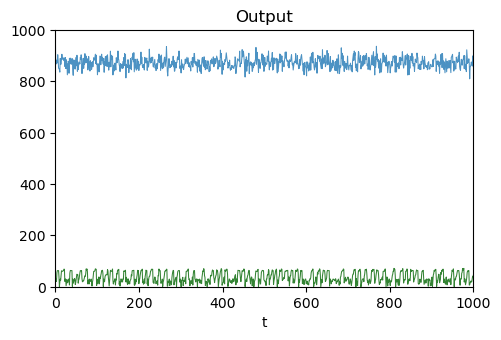

In [616]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,1000])
ax.set_xlim([0,1000])
ax.set_title("Output")
output_total.plot(kind="line", y = "total_firms", x="t", ax=ax, linewidth=0.75, alpha=0.8)
output_max_firm.plot(kind="line", y = "numb_new_firms", x="t", color="darkgreen", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

Distribution of Firm Sizes
The distribution of firm sizes across industries has a very characteristic
shape, that of a power law (also commonly known as a scaling law or Pareto
distribution). Data on firm sizes, measured variously, have proven to have
broadly robust power law behavior over many decades and across national
borders, this despite waves of mergers and acquisitions. Power law
distributions of firm sizes are also characteristic of the non-equilibrium
model described above. This is studied in the next section. Following that,
the distribution of firm growth rates yielded by the model is compared with
data. Then, the distribution of firm lifetimes the model produces is studied.
These also follow a power law.
Axtell 99 S.39

Maximum firm age (for sampling period)

In [629]:
max_age = firm_dk["age"].max().compute()

In [630]:
max_age

20

In [617]:
firm_size = firm_dk[["t", "number_employees"]].compute()

In [618]:
dist=firm_size.groupby(["t", "number_employees"]).size()

function to sample firm size (employee) distribution for different t's

In [653]:
def sample_dist(dist, start, max_age, numb_samples):
    df_list = []
    for x in range(numb_samples):
        i = start + x * max_age
        sample = dist.loc[i, :]
        freq = sample / sample.sum()
        freq_df = freq.reset_index(inplace=False)
        freq_df = freq_df.rename(columns={0: f"Frequency{x}"})
        df_list.append(freq_df)
    return df_list

In [676]:
dfs = sample_dist(dist, 500, 50, 100)

In [656]:
from functools import reduce

In [677]:
df3 = reduce(lambda left,right: pd.merge(left,right,on=["number_employees"], how="outer"), dfs)

In [678]:
df3

,number_employees,Frequency0,Frequency1,Frequency2,Frequency3,Frequency4,Frequency5,Frequency6,Frequency7,Frequency8,...,Frequency90,Frequency91,Frequency92,Frequency93,Frequency94,Frequency95,Frequency96,Frequency97,Frequency98,Frequency99
0,1,0.377193,0.410550,0.346154,0.439636,0.389277,0.455508,0.395683,0.403341,0.411494,...,0.440909,0.384106,0.416107,0.417051,0.390519,0.389549,0.379808,0.401345,0.388128,0.400932
1,2,0.309211,0.277523,0.305288,0.250569,0.258741,0.247881,0.263789,0.269690,0.266667,...,0.218182,0.315673,0.281879,0.239631,0.316027,0.287411,0.269231,0.318386,0.303653,0.284382
2,3,0.157895,0.153670,0.165865,0.141230,0.186480,0.154661,0.136691,0.138425,0.140230,...,0.188636,0.156733,0.161074,0.179724,0.155756,0.147268,0.170673,0.159193,0.175799,0.153846
3,4,0.107456,0.077982,0.088942,0.079727,0.090909,0.086864,0.100719,0.095465,0.082759,...,0.077273,0.061810,0.069351,0.085253,0.056433,0.080760,0.088942,0.049327,0.057078,0.074592
4,5,0.030702,0.029817,0.033654,0.043280,0.037296,0.023305,0.052758,0.033413,0.052874,...,0.038636,0.052980,0.033557,0.032258,0.031603,0.035629,0.036058,0.031390,0.036530,0.044289
5,6,0.008772,0.025229,0.024038,0.020501,0.006993,0.012712,0.021583,0.023866,0.029885,...,0.013636,0.015453,0.020134,0.016129,0.018059,0.030879,0.028846,0.013453,0.011416,0.013986
6,8,0.002193,0.004587,0.009615,0.009112,0.004662,0.006356,0.007194,0.007160,0.004598,...,0.006818,0.002208,0.006711,0.004608,0.004515,0.004751,0.007212,NaN,0.004566,0.004662
7,10,0.002193,0.004587,NaN,0.004556,0.004662,NaN,0.007194,NaN,0.002299,...,NaN,NaN,NaN,0.002304,0.002257,0.002375,0.004808,0.002242,0.002283,NaN
8,11,0.004386,NaN,NaN,0.002278,NaN,0.002119,0.002398,0.007160,NaN,...,0.002273,0.004415,NaN,0.004608,NaN,NaN,NaN,0.004484,NaN,0.002331
9,7,NaN,0.009174,0.016827,0.004556,0.013986,0.006356,0.007194,0.009547,0.002299,...,0.009091,0.004415,0.002237,0.006912,0.018059,0.011876,0.009615,0.011211,0.015982,0.006993


In [679]:
df3['avg'] = df3.iloc[:,1:].mean(axis=1)

C:\Users\41782\AppData\Local\Temp\ipykernel_28596\925191088.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df3['avg'] = df3.iloc[:,1:].mean(axis=1)


In [687]:
dfplot = df3[["number_employees", "avg"]]

In [707]:
x_employees = df3["number_employees"].values.tolist()

In [708]:
y_frequency = df3["avg"].values.tolist()

In [709]:
y_frequency

[0.39662027695277613,
 0.28177753158705016,
 0.15868492368966544,
 0.08148522389256717,
 0.038216928149817225,
 0.018745042456857864,
 0.006095292837127544,
 0.003060672468752695,
 0.0029468047975340687,
 0.009432027420504467,
 0.0023020508530923922,
 0.002304848295863735,
 0.0023020832321115577,
 0.004214901284274448,
 0.0025020565483109616,
 0.002245146854274598,
 0.0026293650185452737,
 0.0023318939442218056,
 0.002442724753250134,
 0.002312830691172013,
 0.002351748788009798,
 0.002372883264276707,
 0.0022471910112359553,
 0.002311296089764503,
 0.002353695190947666,
 0.0023866484392800185,
 0.002340763045887841,
 0.0022991479561926768,
 0.002307495768260356,
 0.002319070111329195,
 0.002322354744667953,
 0.002301499020075216,
 0.002257336343115124,
 0.002289096671119143,
 0.002264322920294236,
 0.002288329519450801]

In [698]:
type(y_frequency)

numpy.ndarray

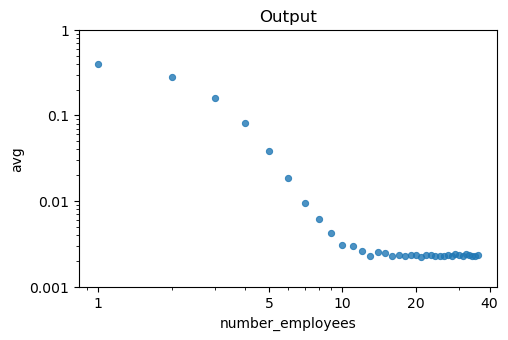

In [710]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
#ax.set_ylim([0,0.4])
#ax.set_xlim([0,100])
ax.set_title("Output")
ticks = (1,5,10,20, 40)
ticksy = (0.001, 0.01, 0.1, 1)
dfplot.plot("number_employees","avg",kind="scatter", ax=ax, linewidth=0.75, alpha=0.8, loglog=True)
ax.set_xticks(ticks=ticks)
ax.set_xticklabels(labels=ticks)
ax.set_yticks(ticks=ticksy)
ax.set_yticklabels(labels=ticksy)
plt.show()

Fit the firmsize power-law data

In [711]:
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

In [712]:
from scipy.optimize import curve_fit

In [713]:
pars, cov = curve_fit(f=power_law, xdata= x_employees, ydata=y_frequency, p0=[0,0], bounds=(-np.inf, np.inf))

In [619]:
test = dist.loc[500, :]

In [620]:
test

number_employees
1     172
2     141
3      72
4      49
5      14
6       4
8       1
10      1
11      2
dtype: int64

In [621]:
frequency = test/test.sum()

In [622]:
freq_df = frequency.reset_index(inplace=False)

In [623]:
freq_df = freq_df.rename(columns={0:"Frequency"})

In [624]:
freq_df

,number_employees,Frequency
0,1,0.377193
1,2,0.309211
2,3,0.157895
3,4,0.107456
4,5,0.030702
5,6,0.008772
6,8,0.002193
7,10,0.002193
8,11,0.004386


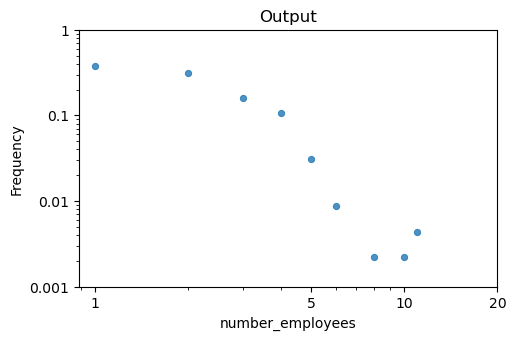

In [627]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
#ax.set_ylim([0,0.4])
#ax.set_xlim([0,100])
ax.set_title("Output")
ticks = (1,5,10,20)
ticksy = (0.001, 0.01, 0.1, 1)
freq_df.plot("number_employees","Frequency",kind="scatter", ax=ax, linewidth=0.75, alpha=0.8, loglog=True)
ax.set_xticks(ticks=ticks)
ax.set_xticklabels(labels=ticks)
ax.set_yticks(ticks=ticksy)
ax.set_yticklabels(labels=ticksy)
plt.show()

Frequency plot with multiple samples

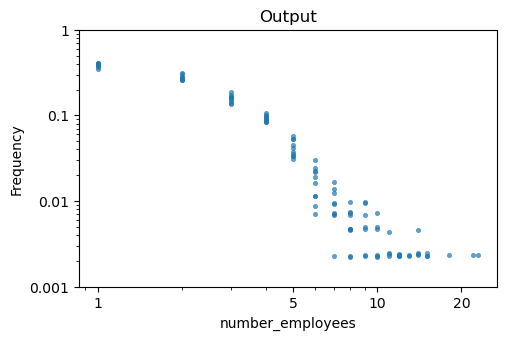

In [647]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
#ax.set_ylim([0,0.4])
#ax.set_xlim([0,100])
ax.set_title("Output")
ticks = (1,5,10,20)
ticksy = (0.001, 0.01, 0.1, 1)
dfs[0].plot("number_employees","Frequency",kind="scatter", ax=ax, linewidth=0.4, alpha=0.7, loglog=True, s=10)
dfs[1].plot("number_employees","Frequency",kind="scatter", ax=ax, linewidth=0.4, alpha=0.7, loglog=True, s=10)
dfs[2].plot("number_employees","Frequency",kind="scatter", ax=ax, linewidth=0.4, alpha=0.7, loglog=True, s=10)
dfs[3].plot("number_employees","Frequency",kind="scatter", ax=ax, linewidth=0.4, alpha=0.7, loglog=True, s=10)
dfs[4].plot("number_employees","Frequency",kind="scatter", ax=ax, linewidth=0.4, alpha=0.7, loglog=True, s=10)
dfs[5].plot("number_employees","Frequency",kind="scatter", ax=ax, linewidth=0.4, alpha=0.7, loglog=True, s=10)
dfs[6].plot("number_employees","Frequency",kind="scatter", ax=ax, linewidth=0.4, alpha=0.7, loglog=True, s=10)
dfs[7].plot("number_employees","Frequency",kind="scatter", ax=ax, linewidth=0.4, alpha=0.7, loglog=True, s=10)
dfs[8].plot("number_employees","Frequency",kind="scatter", ax=ax, linewidth=0.4, alpha=0.7, loglog=True, s=10)
dfs[9].plot("number_employees","Frequency",kind="scatter", ax=ax, linewidth=0.4, alpha=0.7, loglog=True, s=10)
ax.set_xticks(ticks=ticks)
ax.set_xticklabels(labels=ticks)
ax.set_yticks(ticks=ticksy)
ax.set_yticklabels(labels=ticksy)
plt.show()